In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
# !pip install missingno
import missingno as msno
from datetime import date
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler, RobustScaler

In [ ]:
df = pd.read_csv('titanic.csv')

In [ ]:
df.info()

In [ ]:
cols = ['Name', 'Ticket', 'Cabin']
df = df.drop(cols, axis=1)

In [ ]:
df.info()

In [ ]:
df = df.dropna()

In [ ]:
dummies = []
cols = ['Pclass', 'Sex', 'Embarked']
for col in cols:
    dummies.append(pd.get_dummies(df[col]))

In [ ]:
titanic_dummies = pd.concat(dummies, axis=1)


In [ ]:
df = pd.concat((df,titanic_dummies), axis=1)

In [ ]:
df = df.drop(['Pclass', 'Sex', 'Embarked'], axis=1)

In [ ]:
df.info()

In [ ]:
df['Age'] = df['Age'].interpolate()

In [ ]:
df.info()

In [ ]:
X = df.values
y = df['Survived'].values

In [ ]:
X = np.delete(X, 1, axis=1)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived 

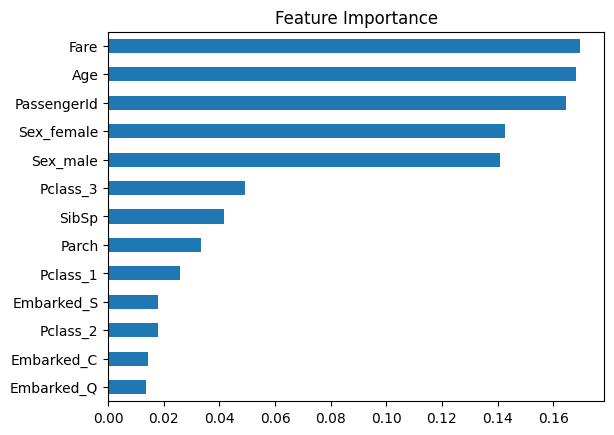

In [21]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import missingno as msno
from datetime import date
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler, RobustScaler

# Load the dataset
df = pd.read_csv('titanic.csv')

# Display information about the dataset
df.info()

# Drop unnecessary columns
cols = ['Name', 'Ticket', 'Cabin']
df = df.drop(cols, axis=1)
df.info()

# Interpolate missing values in 'Age' before dropping rows with other missing values
df['Age'] = df['Age'].interpolate()

# Drop rows with any remaining missing values
df = df.dropna()

# Create dummy variables for categorical features
dummies = []
cols = ['Pclass', 'Sex', 'Embarked']
for col in cols:
    dummies.append(pd.get_dummies(df[col], prefix=col))
titanic_dummies = pd.concat(dummies, axis=1)

# Concatenate the dummy variables with the main dataframe
df = pd.concat([df, titanic_dummies], axis=1)

# Drop the original categorical columns
df = df.drop(['Pclass', 'Sex', 'Embarked'], axis=1)
df.info()

# Separate features and target variable
X = df.drop('Survived', axis=1).values
y = df['Survived'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Initialize and train the Random Forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=0)
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:')
print(classification_report(y_test, y_pred))
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

# Plot feature importance
feature_importances = pd.Series(clf.feature_importances_, index=df.drop('Survived', axis=1).columns)
feature_importances.sort_values().plot(kind='barh')
plt.title('Feature Importance')
plt.show()
